<h1 align='center'> Классификация модельных данных персептроном и нейронной сетью


**Содержание:**

- [Линейно-разделимые данные для классификации](#Линейно-разделимые-данные-для-классификации)
- [Персептрон](#Персептрон)
- [Линейно-неразделимые данные](#Линейно-неразделимые-данные)
- [Многослойный персептрон](#Многослойный-персептрон)
- [Tensor Flow модель одного нейрона](#Tensor-Flow-модель-одного-нейрона)

## Линейно-разделимые данные для классификации

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14,9)
X_and = np.random.randn(200,2)
y_and = np.logical_and( X_and[:,0]+X_and[:,1] > 0, 1)
y_and = np.where( y_and, 1, -1)
np.unique(y_and)

array([-1,  1])

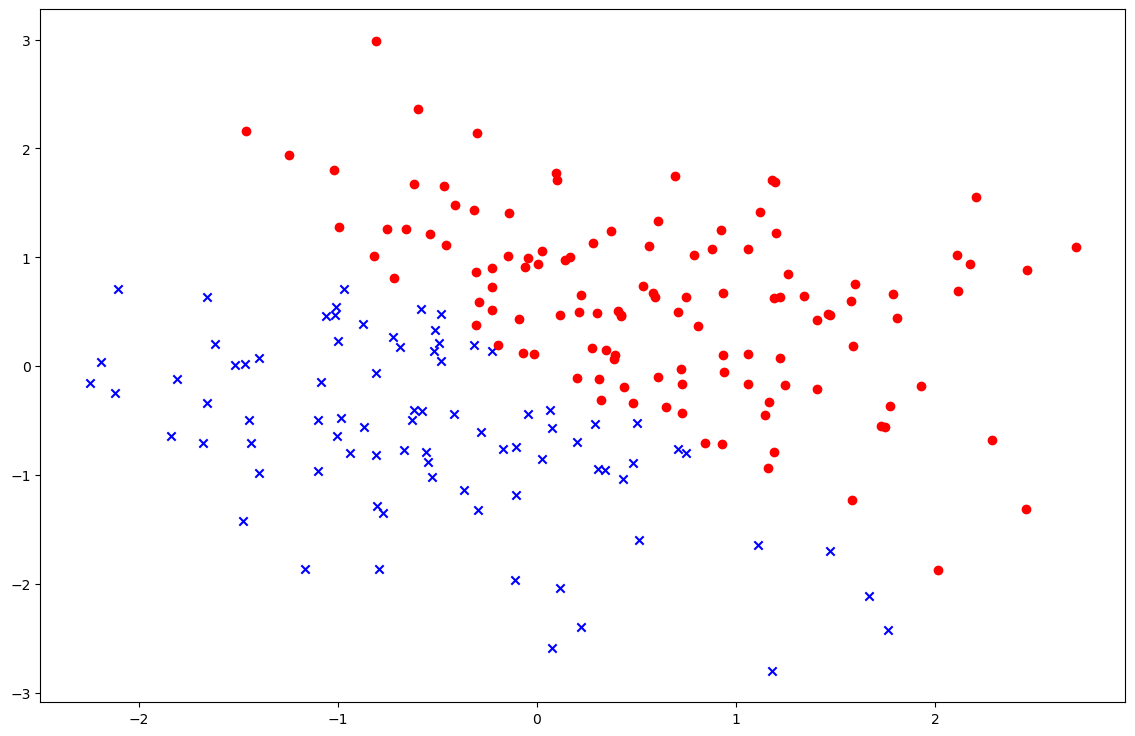

In [4]:
plt.scatter(X_and[y_and == -1,0], X_and[y_and == -1,1], color='blue', marker='x')
plt.scatter(X_and[y_and == 1,0], X_and[y_and == 1,1], color='red', marker='o')

## Персептрон

In [5]:
class Perceptron(object):

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.w_ = None   # весовой вектор
        self.w0_ = None # смещение
        self.errors_ = None # история ошибок в процессе обучения
        
    def net_input(self, X):
        return np.dot(X, self.w_) + self.w0_
    
    def activate(self, z):
        return np.where( z >= 0, 1, -1 )
    
    def theta(self, phi):
        return np.where( phi >= 0, 1, -1 )

    def predict(self, X):
        z = self.net_input(X)
        phi = self.activate(z)
        return self.theta(phi)
    
    def fit(self, X, y):
        # инициализация процесса обучения
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=1.0, size=X.shape[1])
        self.w0_ = rgen.normal(loc=0.0, scale=1.0, size=None)
        self.errors_ = []
        
        # обучаем
        for _ in range(0, self.n_iter):
            errors = 0
            for xi, trg in zip(X,y):
                trg_pred = self.predict(xi)
                update = self.eta * ( trg - trg_pred )
                self.w_ += update * xi
                self.w0_ += update
                errors += int(update != 0)
            self.errors_.append(errors)
            
        # обучение закончено
        return self

<AxesSubplot:>

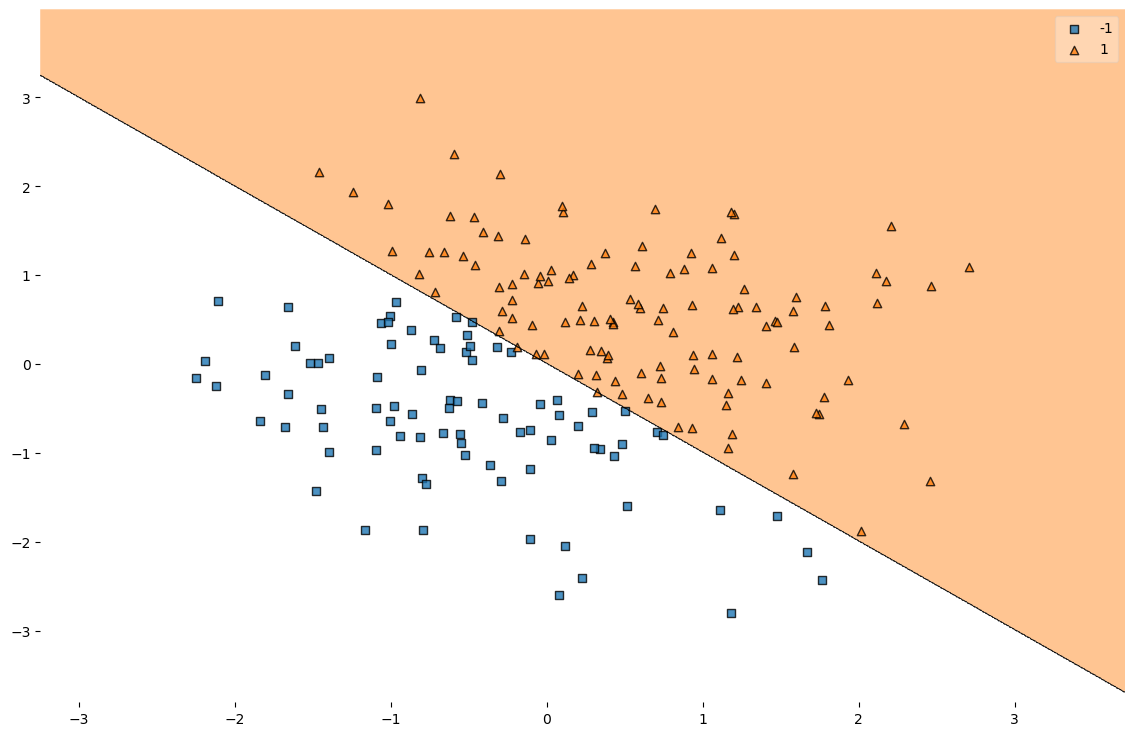

In [6]:
from mlxtend.plotting import plot_decision_regions
ppn=Perceptron()
ppn.fit(X_and,y_and)
plot_decision_regions(X_and, y_and, clf=ppn)

In [7]:
ppn.w_, ppn.w0_

(array([0.88443549, 0.8867277 ]), -0.008171752263455519)

Задание 1
---
Внесите изменения в коэффициенты данных y_and = np.logical_and( a\*X_and\[:,0\]+b\*X_and\[:,1\] > c, 1). Например, a = 0.2, b = 0.3, c = 0.1. Выполните классификацию персептроном определите весовые коэффициенты. 

## Линейно-неразделимые данные

In [8]:
X_xor = np.random.normal(200,2)
y_xor = np.logical_xor( X_xor[:,0] > 0, X_xor[:,1]>0)
y_xor = np.where( y_xor, 1, -1)
np.unique(y_xor)

array([-1,  1])

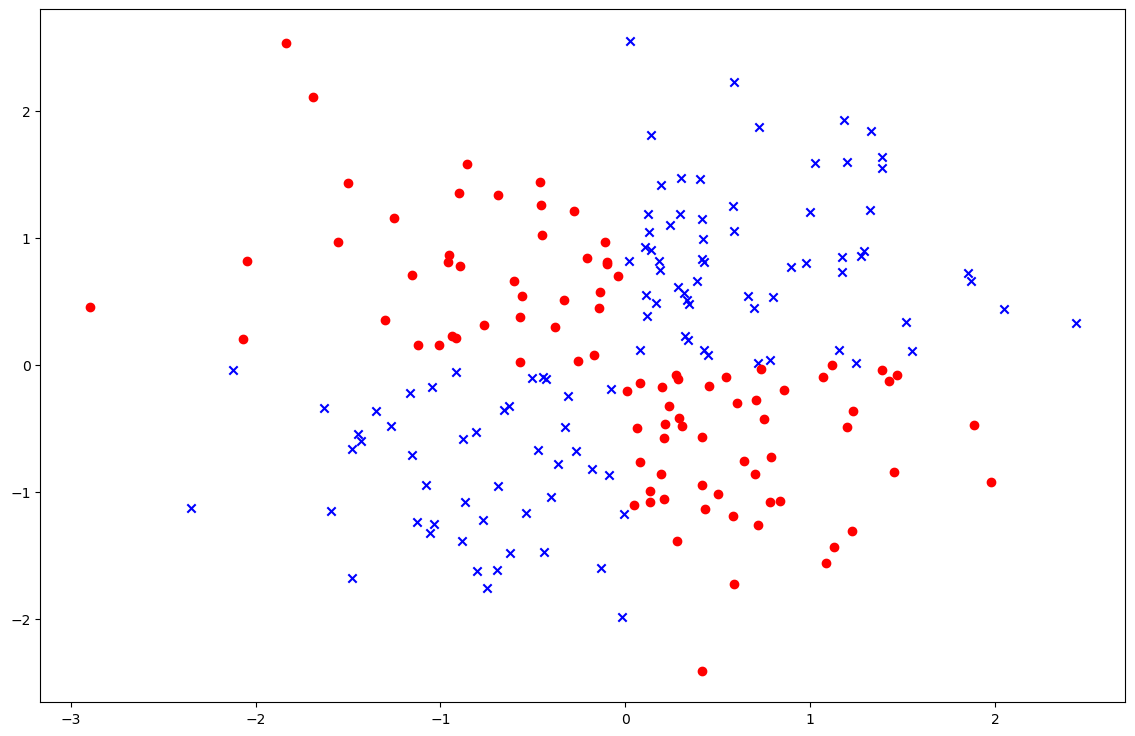

In [9]:
plt.scatter(X_xor[y_xor == -1,0], X_xor[y_xor == -1,1], color='blue', marker='x')
plt.scatter(X_xor[y_xor == 1,0], X_xor[y_xor == 1,1], color='red', marker='o')

<AxesSubplot:>

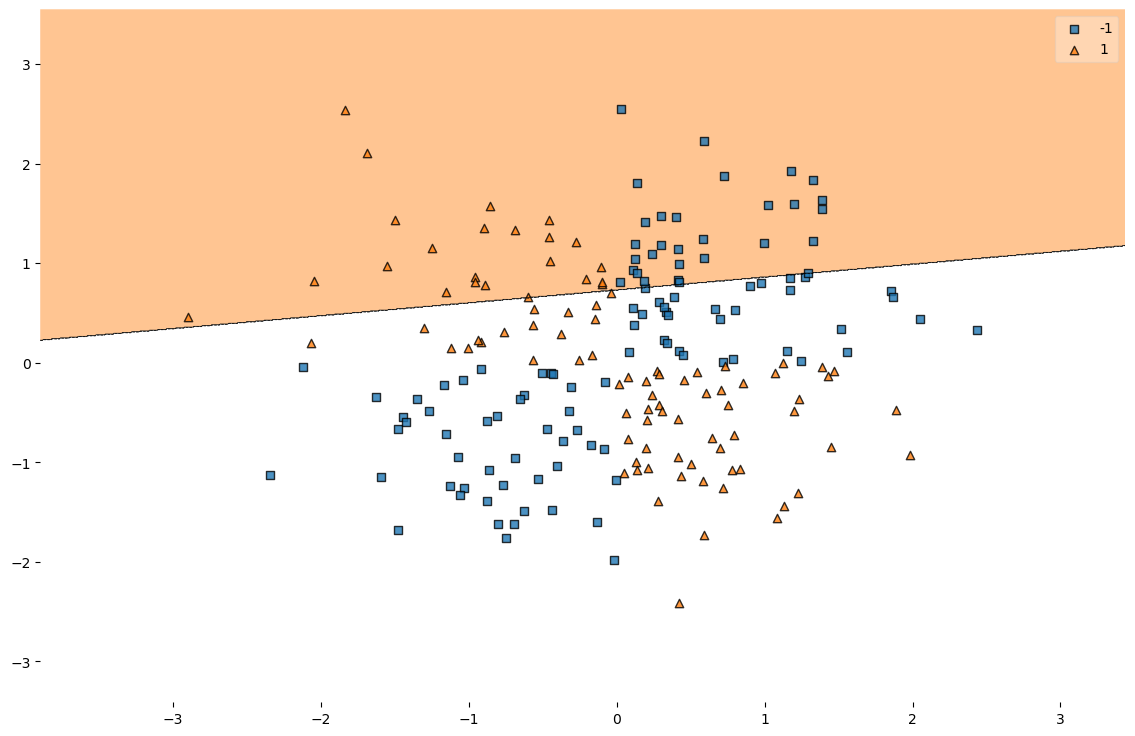

In [10]:
ppn_xor=Perceptron()
ppn_xor.fit(X_xor,y_xor)
plot_decision_regions(X_xor, y_xor, clf=ppn_xor)

Задание 2.
---
Создайте нелинейный признак к данным X_xor и выполните классификацию персептроном в расширенном пространстве признаков.

## Многослойный персептрон

In [1]:
from sklearn.neural_network import MLPClassifier

In [2]:
clf=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
clf.fit(X_xor,y_xor)

NameError: name 'X_xor' is not defined

In [13]:
clf.predict([[2,2], [-1,-2]])

array([-1, -1])

In [14]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [13]:
clf.predict_proba([[2,2],[1,2]])

array([[1.00000000e+000, 2.03289164e-132],
       [1.00000000e+000, 1.18585638e-068]])

<AxesSubplot:>

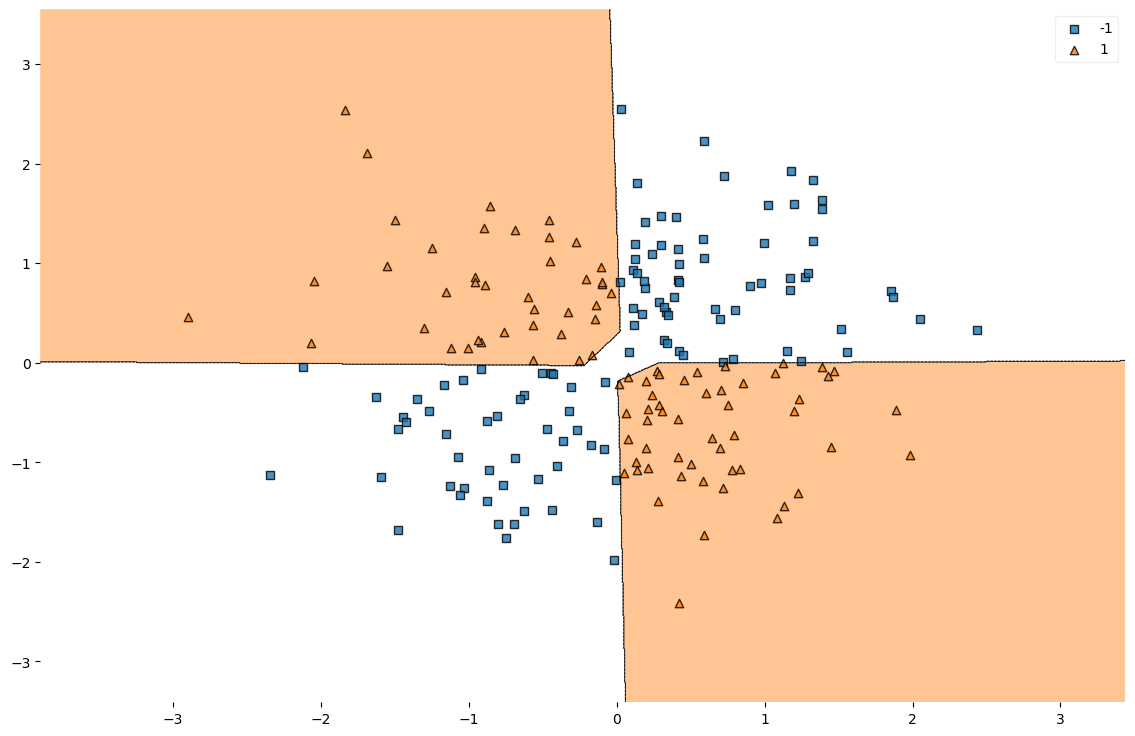

In [15]:
plot_decision_regions(X_xor, y_xor, clf=clf)

Задание 3.
---
Выполните классификацию X_xor данных нейронной сетью архитектуры подобной описанной в презентации. Сравните точность классификации по сравнению чисел неправильно классифицированных значений.

## Tensor Flow модель одного нейрона

In [82]:
from tensorflow import keras
from tensorflow.keras import layers

# Создадим слой нейронов состоящий из одного нейрона
model = keras.Sequential([layers.Dense(units=1, activation='hard_sigmoid' ,input_shape=[2])])

# Укажем параметры алгоритма оптимизации модели
model.compile(optimizer='Adam', loss='mae')

# Проведем обучение модели
history = model.fit(
    X_and[0:150,:], y_and[0:150],
    validation_data=(X_and[151:-1,:], y_and[151:-1]),
    batch_size=1,
    epochs=100,
)

Train on 150 samples, validate on 48 samples
Epoch 1/100
150/150 [==============================] - 1s 4ms/sample - loss: 0.9405 - val_loss: 1.0184
Epoch 2/100
150/150 [==============================] - 0s 2ms/sample - loss: 0.9202 - val_loss: 1.0015
Epoch 3/100
150/150 [==============================] - 0s 2ms/sample - loss: 0.9003 - val_loss: 0.9845
Epoch 4/100
150/150 [==============================] - 0s 2ms/sample - loss: 0.8805 - val_loss: 0.9682
Epoch 5/100
150/150 [==============================] - 0s 1ms/sample - loss: 0.8611 - val_loss: 0.9526
Epoch 6/100
150/150 [==============================] - 0s 2ms/sample - loss: 0.8429 - val_loss: 0.9370
Epoch 7/100
150/150 [==============================] - 0s 2ms/sample - loss: 0.8243 - val_loss: 0.9218
Epoch 8/100
150/150 [==============================] - 0s 2ms/sample - loss: 0.8063 - val_loss: 0.9077
Epoch 9/100
150/150 [==============================] - 0s 1ms/sample - loss: 0.7905 - val_loss: 0.8955
Epoch 10/100
150/150 [======

<AxesSubplot:>

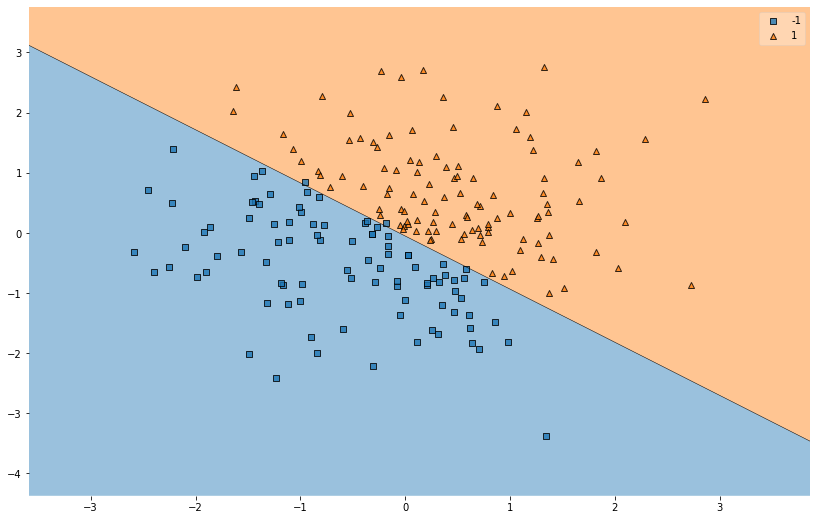

In [83]:
plot_decision_regions(X_and, y_and, clf=model)

<AxesSubplot:>

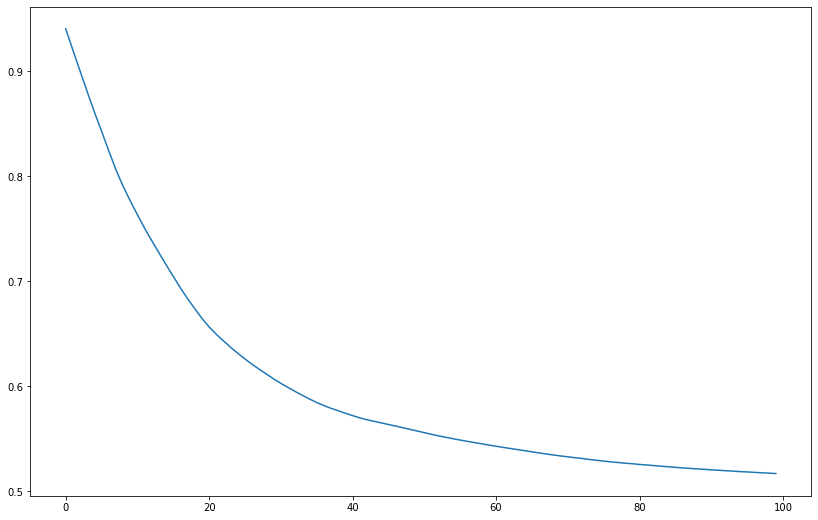

In [84]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df['loss'].plot()

Задание 4
---
Выполнить классификацию данных X_xor. Визуализировать работу классификатора model.